In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
df1=pd.read_csv('/content/train.csv')
df2=pd.read_csv('/content/test.csv')

In [3]:
df1.head()

,Tweets,label
0,Asked #ChatGPT about what it thinks are the pr...,Positive
1,#ChatGPT tornado has already traveled around t...,Neutral
2,This is a great explanation of why #EVs are mo...,Positive
3,‘if you need to write a box-ticking social med...,Positive
4,Just saw an AI tool making my coffee for me. \...,Positive


In [4]:
df2.head()

,@CoffeeVectors @jenny____r confirmed #ChatGPT has dad jokes https://t.co/tC2Sks2f76,Positive
0,Sooooo depressing (our competition as journos ...,Negative
1,I just had a 4 hour deep conversation with #Ch...,Positive
2,I began to explore #chatgpt today.\n\nI asked ...,Negative
3,/2023\n1. Ask #ChatGPT\n2. Add some content\n3...,Positive
4,#Explained: Are you soon going to be replaced?...,Negative


In [5]:
df1.label.value_counts()

Positive    378
Negative    143
Neutral      78
Name: label, dtype: int64

In [6]:
df1.describe()

,Tweets,label
count,599,599
unique,599,3
top,Asked #ChatGPT about what it thinks are the pr...,Positive
freq,1,378


In [7]:
df1['label'] = df1['label'].map({'Positive': 0, 'Negative': 1, 'Neutral': 2})


df1.head()

,Tweets,label
0,Asked #ChatGPT about what it thinks are the pr...,0.0
1,#ChatGPT tornado has already traveled around t...,2.0
2,This is a great explanation of why #EVs are mo...,0.0
3,‘if you need to write a box-ticking social med...,0.0
4,Just saw an AI tool making my coffee for me. \...,0.0


In [8]:
df1 = df1.replace([np.inf, -np.inf], np.nan)
df1 = df1.dropna()

In [9]:
df1['label'] = df1['label'].astype(int)



In [10]:
df1.head()

,Tweets,label
0,Asked #ChatGPT about what it thinks are the pr...,0
1,#ChatGPT tornado has already traveled around t...,2
2,This is a great explanation of why #EVs are mo...,0
3,‘if you need to write a box-ticking social med...,0
4,Just saw an AI tool making my coffee for me. \...,0


In [11]:
df_0=df1[df1['label']==0]
df_1=df1[df1['label']==1]
df_2=df1[df1['label']==2]

Text(0.5, 1.0, 'word cloud for positive')

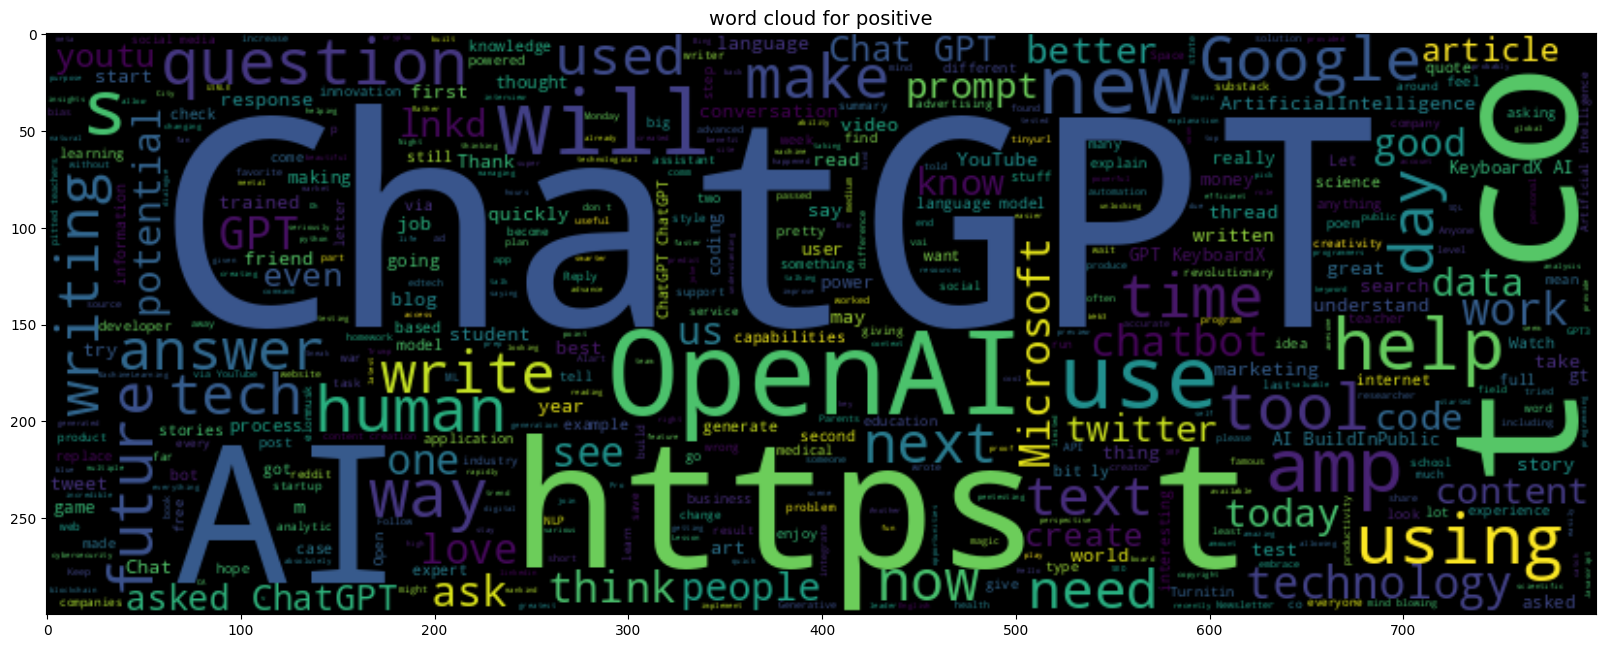

In [12]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500,width=800, height=300).generate(" ".join(df_0.Tweets))
plt.imshow(wc, interpolation='bilinear')
plt.title("word cloud for positive", fontsize=14)

Text(0.5, 1.0, 'word cloud for negative')

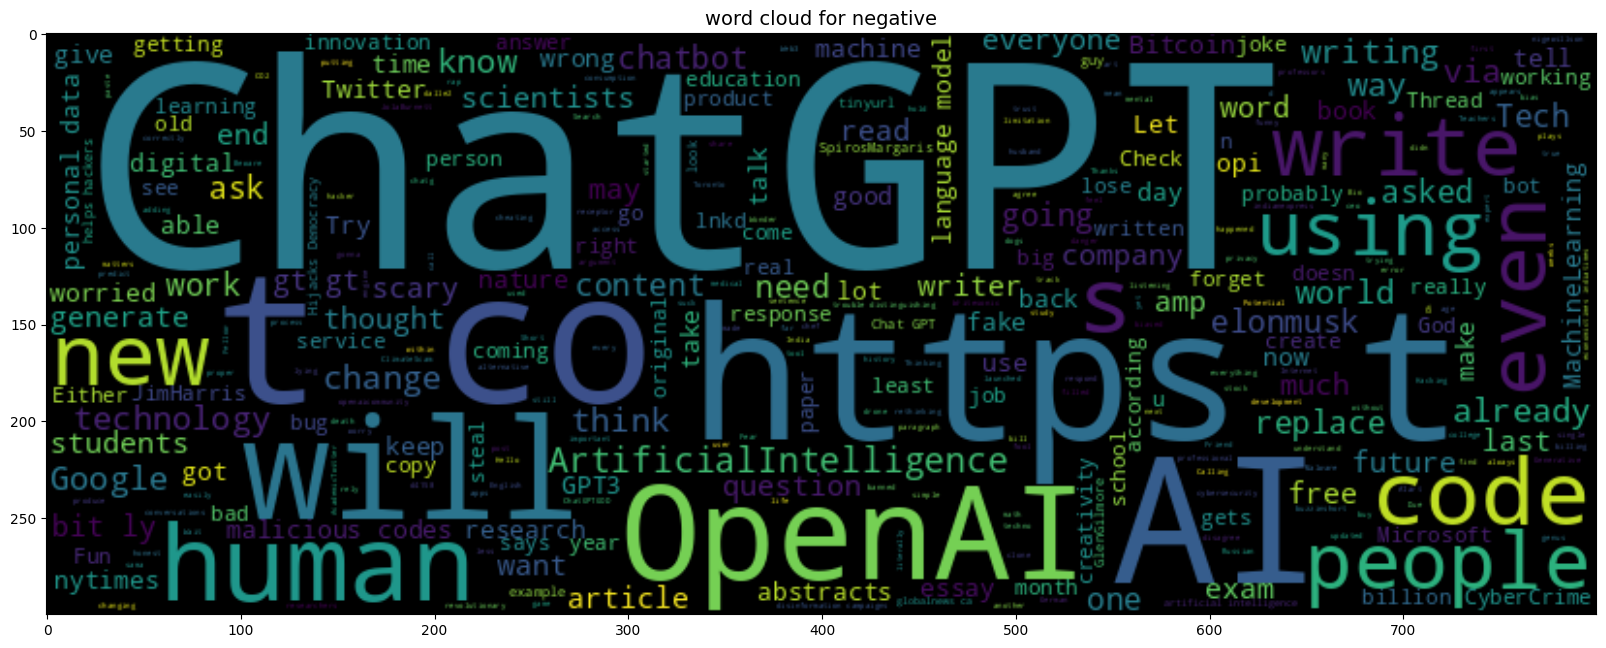

In [13]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500,width=800, height=300).generate(" ".join(df_1.Tweets))
plt.imshow(wc, interpolation='bilinear')
plt.title("word cloud for negative", fontsize=14)

Text(0.5, 1.0, 'word cloud for neutral')

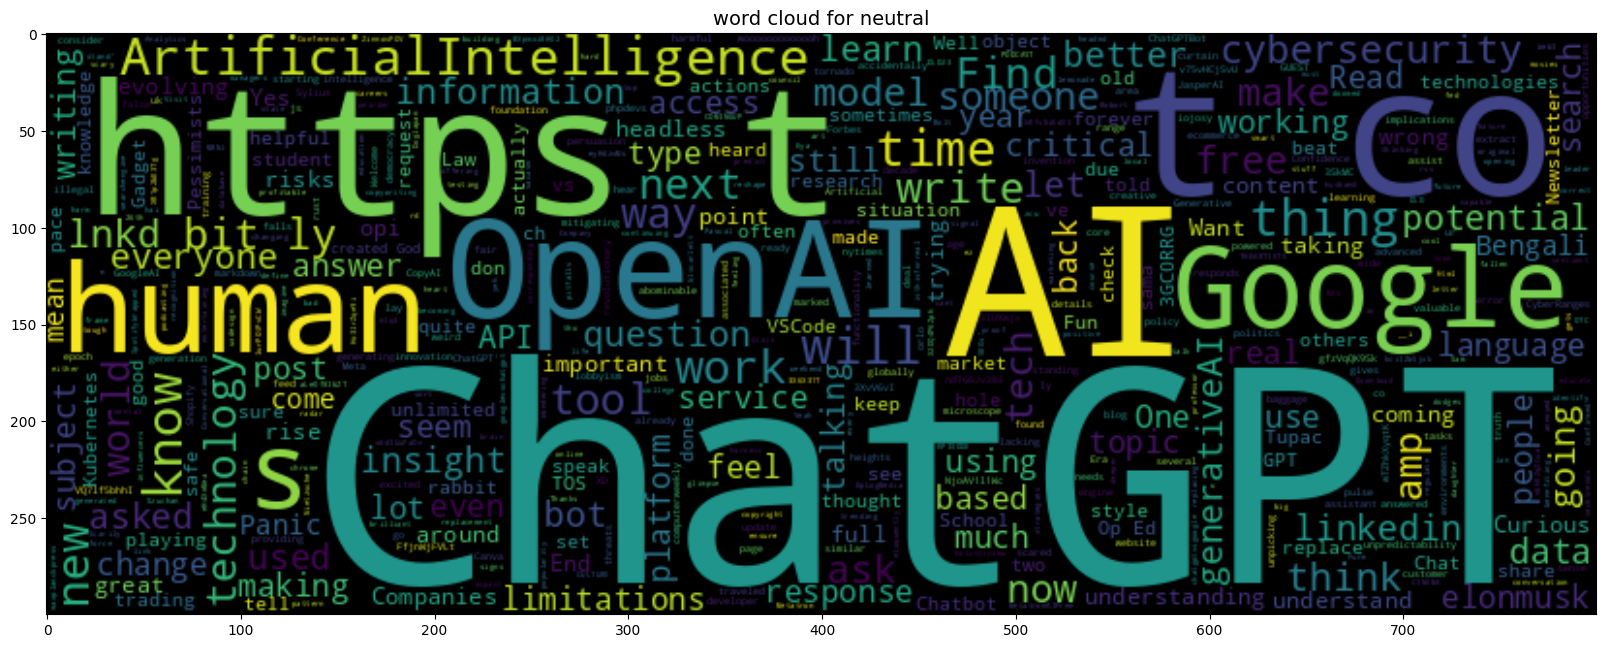

In [14]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500,width=800, height=300).generate(" ".join(df_2.Tweets))
plt.imshow(wc, interpolation='bilinear')
plt.title("word cloud for neutral", fontsize=14)

**Data preprocessing**

In [15]:
for i, col in enumerate(df1.columns):
  df1.iloc[:, i]=df1.iloc[:, i].astype(str).str.replace("'", '')

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
stop=stopwords.words('english')

In [18]:
lemmatizer=WordNetLemmatizer()

In [19]:
from bs4 import BeautifulSoup
import re

In [20]:
def text_to_words(raw_text):
  url = re.compile('https?://\S+|www\.\S+')
  url = url.sub(r'', raw_text)
  text = BeautifulSoup(raw_text,'html.parser').get_text()
  letters_only=re.sub('[^a-zA-z]',' ',text)
  words=letters_only.lower().split()
  no_stopwords=[w for w in words if not w in stop]
  lemmatize_words=[lemmatizer.lemmatize(w) for w in no_stopwords]
  return (" ".join(lemmatize_words))

In [21]:
df1['clean_tweet']=df1['Tweets'].apply(text_to_words)

<ipython-input-20-effe2a7faae1>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(raw_text,'html.parser').get_text()


In [22]:
df1.head()

,Tweets,label,clean_tweet
0,Asked #ChatGPT about what it thinks are the pr...,0,asked chatgpt think problem associated urbanis...
1,#ChatGPT tornado has already traveled around t...,2,chatgpt tornado already traveled around world ...
2,This is a great explanation of why #EVs are mo...,0,great explanation ev efficient energy source c...
3,‘if you need to write a box-ticking social med...,0,need write box ticking social medium post usin...
4,Just saw an AI tool making my coffee for me. \...,0,saw ai tool making coffee chatgpt ai aimagic


In [23]:
df_new=df1[['clean_tweet','label']]

In [24]:
df_new.head()

,clean_tweet,label
0,asked chatgpt think problem associated urbanis...,0
1,chatgpt tornado already traveled around world ...,2
2,great explanation ev efficient energy source c...,0
3,need write box ticking social medium post usin...,0
4,saw ai tool making coffee chatgpt ai aimagic,0


In [25]:
X = df_new['clean_tweet'].values
y = df_new['label'].values

In [26]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

In [27]:
X_padded = pad_sequences(X_sequences,maxlen=100)

In [28]:
y_one_hot = tf.keras.utils.to_categorical(y, num_classes=3)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_one_hot, test_size=0.2, random_state=42)


In [30]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X_padded.shape[1]))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
15/15 [==============================] - 13s 272ms/step - loss: 0.9560 - accuracy: 0.6326 - val_loss: 0.9717 - val_accuracy: 0.5917
Epoch 2/20
15/15 [==============================] - 2s 147ms/step - loss: 0.8841 - accuracy: 0.6409 - val_loss: 0.9285 - val_accuracy: 0.5917
Epoch 3/20
15/15 [==============================] - 2s 150ms/step - loss: 0.8421 - accuracy: 0.6409 - val_loss: 0.9240 - val_accuracy: 0.5917
Epoch 4/20
15/15 [==============================] - 2s 146ms/step - loss: 0.9010 - accuracy: 0.6973 - val_loss: 0.9399 - val_accuracy: 0.6167
Epoch 5/20
15/15 [==============================] - 3s 171ms/step - loss: 0.5394 - accuracy: 0.8518 - val_loss: 0.9531 - val_accuracy: 0.5917
Epoch 6/20
15/15 [==============================] - 3s 187ms/step - loss: 0.4205 - accuracy: 0.8559 - val_loss: 0.9086 - val_accuracy: 0.6083
Epoch 7/20
15/15 [==============================] - 2s 145ms/step - loss: 0.3251 - accuracy: 0.8601 - val_loss: 0.9244 - val_accuracy: 0.6167
Epoch

In [33]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss:.4f}')

4/4 [==============================] - 0s 36ms/step - loss: 0.9086 - accuracy: 0.6083
Test Accuracy: 60.83%
Test Loss: 0.9086


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
y_pred_labels = tf.argmax(model.predict(X_test), axis=1)

4/4 [==============================] - 1s 32ms/step


In [36]:
y_true_labels = tf.argmax(y_test, axis=1)

In [37]:
print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        71
           1       0.38      0.30      0.34        33
           2       0.00      0.00      0.00        16

    accuracy                           0.61       120
   macro avg       0.35      0.40      0.37       120
weighted avg       0.50      0.61      0.55       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
df2.rename(columns={'@CoffeeVectors @jenny____r confirmed #ChatGPT has dad jokes https://t.co/tC2Sks2f76': 'tweets', 'Positive': 'label'}, inplace=True)


In [39]:
df2.head()

,tweets,label
0,Sooooo depressing (our competition as journos ...,Negative
1,I just had a 4 hour deep conversation with #Ch...,Positive
2,I began to explore #chatgpt today.\n\nI asked ...,Negative
3,/2023\n1. Ask #ChatGPT\n2. Add some content\n3...,Positive
4,#Explained: Are you soon going to be replaced?...,Negative


In [40]:
for i, col in enumerate(df2.columns):
  df2.iloc[:, i]=df2.iloc[:, i].astype(str).str.replace("'", '')

In [41]:
def text_to_words(raw_text):
  url = re.compile('https?://\S+|www\.\S+')
  url = url.sub(r'', raw_text)
  text = BeautifulSoup(raw_text,'html.parser').get_text()
  letters_only=re.sub('[^a-zA-z]',' ',text)
  words=letters_only.lower().split()
  no_stopwords=[w for w in words if not w in stop]
  lemmatize_words=[lemmatizer.lemmatize(w) for w in no_stopwords]
  return (" ".join(lemmatize_words))

In [42]:
df2['clean_tweet']=df2['tweets'].apply(text_to_words)

<ipython-input-41-effe2a7faae1>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(raw_text,'html.parser').get_text()


In [43]:
df_new2=df2[['clean_tweet','label']]

In [44]:
df_new2.head()

,clean_tweet,label
0,sooooo depressing competition journos writer s...,Negative
1,hour deep conversation chatgpt future wild kno...,Positive
2,began explore chatgpt today asked bio found ma...,Negative
3,ask chatgpt add content publish,Positive
4,explained soon going replaced actually heading...,Negative


In [45]:
df2['label'] = df2['label'].map({'Positive': 0, 'Negative': 1, 'Neutral': 2})


df2.head()

,tweets,label,clean_tweet
0,Sooooo depressing (our competition as journos ...,1,sooooo depressing competition journos writer s...
1,I just had a 4 hour deep conversation with #Ch...,0,hour deep conversation chatgpt future wild kno...
2,I began to explore #chatgpt today.\n\nI asked ...,1,began explore chatgpt today asked bio found ma...
3,/2023\n1. Ask #ChatGPT\n2. Add some content\n3...,0,ask chatgpt add content publish
4,#Explained: Are you soon going to be replaced?...,1,explained soon going replaced actually heading...


In [46]:
df_new2=df2[['clean_tweet','label']]

In [47]:
df_new2.head()

,clean_tweet,label
0,sooooo depressing competition journos writer s...,1
1,hour deep conversation chatgpt future wild kno...,0
2,began explore chatgpt today asked bio found ma...,1
3,ask chatgpt add content publish,0
4,explained soon going replaced actually heading...,1


In [48]:
X_new = df2['clean_tweet'].values

In [49]:
X_new_sequences = tokenizer.texts_to_sequences(X_new)
X_new_padded = pad_sequences(X_new_sequences, maxlen=X_padded.shape[1])

In [50]:
y_new = df2['label'].values
y_new_one_hot = tf.keras.utils.to_categorical(y_new, num_classes=3)

In [52]:
loss_new, accuracy_new = model.evaluate(X_new_padded, y_new_one_hot, verbose=1)
print(f'test data: {accuracy_new * 100:.2f}%')
print(f'test Data Loss: {loss_new:.4f}')

6/6 [==============================] - 0s 31ms/step - loss: 0.9877 - accuracy: 0.7000
test data: 70.00%
test Data Loss: 0.9877
